In [0]:
from google.colab import drive
drive.mount('/content/drive/')
import os
path=os.getcwd()

path0=path+'/drive/My Drive/Colab Notebooks/blood cells/TRAIN/'
print (path0)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/blood cells/TRAIN/


Using TensorFlow backend.


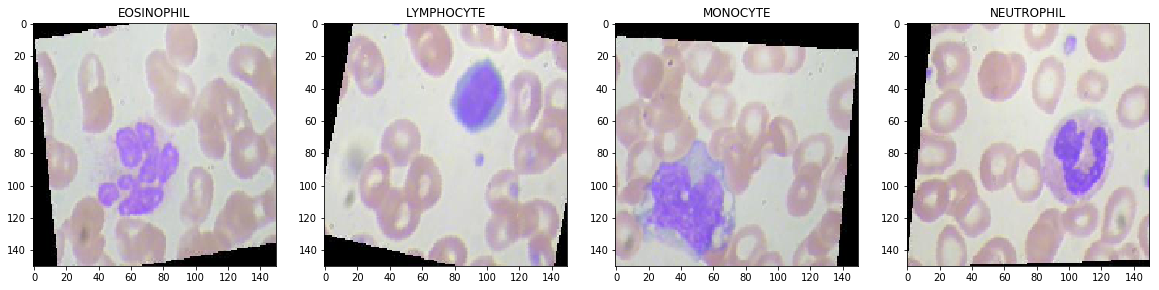

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array,array_to_img
EOSINOPHIL = load_img(path0+'EOSINOPHIL/_0_207.jpeg',target_size=(150,150,3))
LYMPHOCYTE = load_img(path0+'LYMPHOCYTE/_0_204.jpeg',target_size=(150,150,3))
MONOCYTE = load_img(path0+'MONOCYTE/_0_260.jpeg',target_size=(150,150,3))
NEUTROPHIL = load_img(path0+'NEUTROPHIL/_0_1986.jpeg',target_size=(150,150,3))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(1,4,1)
plt.title('EOSINOPHIL')
ax1.imshow(EOSINOPHIL)
ax2 = fig.add_subplot(1,4,2)
plt.title('LYMPHOCYTE')
ax2.imshow(LYMPHOCYTE)
ax3 = fig.add_subplot(1,4,3)
plt.title('MONOCYTE')
ax3.imshow(MONOCYTE)
ax4 = fig.add_subplot(1,4,4)
plt.title('NEUTROPHIL')
ax4.imshow(NEUTROPHIL)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        path+'/drive/My Drive/Colab Notebooks/blood cells/TRAIN',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        shuffle=False)  

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        path+'/drive/My Drive/Colab Notebooks/blood cells/TEST',
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=False)

# this is a similar generator, for validation data
# batches of augmented image data
evaluation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_generator = evaluation_datagen.flow_from_directory(
        path+'/drive/My Drive/Colab Notebooks/blood cells/TEST_SIMPLE',
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=False)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [0]:
# import library of PlotLosses to plot the live training error of each epoch 
!pip install livelossplot
from livelossplot.keras import PlotLossesCallback
plot_losses = PlotLossesCallback()

In [0]:
from keras.callbacks import TensorBoard
plot_losses=TensorBoard()

In [0]:
# CNN architecture 
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras import optimizers

K.set_image_dim_ordering('th')

keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(64, (3, 3),padding='same',input_shape=(3,150, 150),data_format="channels_first"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),dim_ordering="th"))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),dim_ordering="th"))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),dim_ordering="th"))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),dim_ordering="th"))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),dim_ordering="th"))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3),padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),dim_ordering="th"))
model.add(Dropout(0.5))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

#model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

adam = optimizers.Adam(lr=0.001, decay=1e-6)

model.compile( loss = "binary_crossentropy", 
               optimizer = adam, 
               metrics=['accuracy']
             )

# CNN model brief veiw of each layer 
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), st

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 150, 150)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 150, 150)      600       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 150, 150)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 75, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 75, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 75, 75)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 75, 75)        300       
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 128
# this is the augmentation configuration we will use for training
# only rescaling
train_datagen = ImageDataGenerator(
                rescale=1./255)
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        path+'/drive/My Drive/Colab Notebooks/blood cells/TRAIN',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        shuffle=False)  

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        path+'/drive/My Drive/Colab Notebooks/blood cells/TEST',
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=False)

# this is a similar generator, for validation data
# batches of augmented image data
evaluation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_generator = evaluation_datagen.flow_from_directory(
        path+'/drive/My Drive/Colab Notebooks/blood cells/TEST_SIMPLE',
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=False)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [0]:
model.load_weights(path+'/drive/My Drive/Colab Notebooks/blood cells/v4 weithgts.h5')

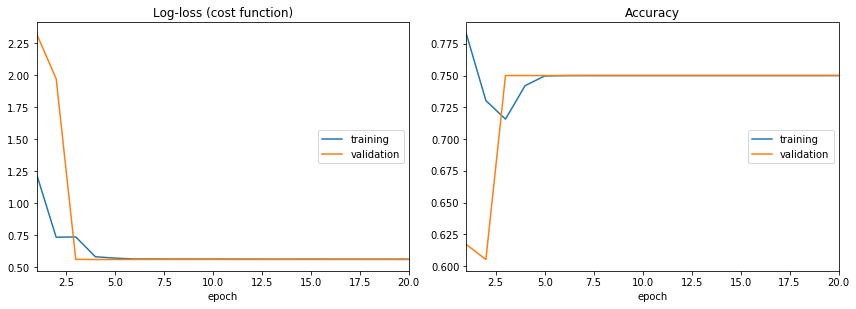

Log-loss (cost function):
training   (min:    0.565, max:    1.228, cur:    0.565)
validation (min:    0.562, max:    2.322, cur:    0.562)

Accuracy:
training   (min:    0.716, max:    0.783, cur:    0.750)
validation (min:    0.605, max:    0.750, cur:    0.750)


In [0]:
model.fit_generator(
        train_generator,
        steps_per_epoch=9957 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=2487 // batch_size,
        callbacks=[plot_losses])
model.save_weights(path+'/drive/My Drive/Colab Notebooks/blood cells/v4 weithgts.h5')

In [0]:
print(model.evaluate_generator(evaluation_generator,steps=10))
print(model.metrics_names)

[0.5658811926841736, 0.75]
['loss', 'acc']


In [0]:
print(model.evaluate_generator(validation_generator,steps=10))
print(model.metrics_names)

[0.5594603896141053, 0.75]
['loss', 'acc']


In [0]:
print(model.evaluate_generator(train_generator,steps=10))
print(model.metrics_names)

[0.5721887629791345, 0.75]
['loss', 'acc']
